<a href="https://colab.research.google.com/github/Madhu-3499/DataScienceEssentials/blob/main/Madhu_surisetti_INFO5731_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
import csv
from collections import defaultdict

def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Step 1: Read the CSV file
def read_cleaned_reviews_csv(file_path):
    cleaned_reviews = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            cleaned_reviews.append(row[0])  # Assuming the first column contains cleaned reviews
    return cleaned_reviews

# Step 2: Count the frequency of all the N-grams (N=3)
def count_ngrams(cleaned_reviews):
    ngram_counts = defaultdict(int)
    for review in cleaned_reviews:
        ngrams = generate_ngrams(review, 3)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return ngram_counts

# Main function
def main():
    file_path = "cleaned_reviews.csv"  # Replace with your file path
    cleaned_reviews = read_cleaned_reviews_csv(file_path)
    ngram_counts = count_ngrams(cleaned_reviews)

    # Output the frequency of all the N-grams
    for ngram, count in ngram_counts.items():
        print(f"N-gram: {ngram}, Frequency: {count}")

if __name__ == "__main__":
    main()


N-gram: The worst one, Frequency: 1
N-gram: worst one yet., Frequency: 1
N-gram: They need to, Frequency: 1
N-gram: need to stop, Frequency: 1
N-gram: I literally thought, Frequency: 1
N-gram: literally thought this, Frequency: 1
N-gram: thought this was, Frequency: 1
N-gram: this was a, Frequency: 1
N-gram: was a parody, Frequency: 1
N-gram: a parody skit, Frequency: 1
N-gram: parody skit off, Frequency: 1
N-gram: skit off of, Frequency: 1
N-gram: off of SNL!, Frequency: 1
N-gram: its comically bad, Frequency: 1
N-gram: When "Avengers" meets, Frequency: 1
N-gram: "Avengers" meets "Fast, Frequency: 1
N-gram: meets "Fast and, Frequency: 1
N-gram: "Fast and the, Frequency: 1
N-gram: and the furious", Frequency: 1
N-gram: the furious" everything, Frequency: 1
N-gram: furious" everything goes, Frequency: 1
N-gram: everything goes wrong, Frequency: 1
N-gram: Toretto just started, Frequency: 1
N-gram: just started playing, Frequency: 1
N-gram: started playing Rocket, Frequency: 1
N-gram: pla

In [4]:
import csv
from collections import defaultdict

# Step 1: Read the CSV file
def read_cleaned_reviews_csv(file_path):
    cleaned_reviews = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            cleaned_reviews.append(row[0])  # Assuming the first column contains cleaned reviews
    return cleaned_reviews

# Step 2: Calculate the probabilities for all the bigrams
def calculate_bigram_probabilities(cleaned_reviews):
    bigram_counts = defaultdict(int)
    word_counts = defaultdict(int)

    # Count bigrams and individual words
    for review in cleaned_reviews:
        words = review.split()
        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            bigram_counts[bigram] += 1
            word_counts[words[i]] += 1

    # Calculate probabilities for each bigram
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        w2, w1 = bigram
        probability = count / word_counts[w2]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Main function
def main():
    file_path = "cleaned_reviews.csv"  # Replace with your file path
    cleaned_reviews = read_cleaned_reviews_csv(file_path)
    bigram_probabilities = calculate_bigram_probabilities(cleaned_reviews)

    # Output the probabilities for all the bigrams
    for bigram, probability in bigram_probabilities.items():
        print(f"Bigram: {bigram}, Probability: {probability:.2f}")

if __name__ == "__main__":
    main()


Bigram: ('Excruciatingly', 'Awful'), Probability: 1.00
Bigram: ('What', 'Happened?'), Probability: 0.50
Bigram: ('The', 'worst'), Probability: 0.33
Bigram: ('worst', 'one'), Probability: 0.50
Bigram: ('one', 'yet.'), Probability: 0.50
Bigram: ('Fast', 'X'), Probability: 1.00
Bigram: ('They', 'need'), Probability: 0.50
Bigram: ('need', 'to'), Probability: 1.00
Bigram: ('to', 'stop'), Probability: 0.50
Bigram: ('I', 'literally'), Probability: 1.00
Bigram: ('literally', 'thought'), Probability: 1.00
Bigram: ('thought', 'this'), Probability: 1.00
Bigram: ('this', 'was'), Probability: 0.50
Bigram: ('was', 'a'), Probability: 1.00
Bigram: ('a', 'parody'), Probability: 0.33
Bigram: ('parody', 'skit'), Probability: 1.00
Bigram: ('skit', 'off'), Probability: 1.00
Bigram: ('off', 'of'), Probability: 1.00
Bigram: ('of', 'SNL!'), Probability: 0.17
Bigram: ('its', 'comically'), Probability: 1.00
Bigram: ('comically', 'bad'), Probability: 1.00
Bigram: ('When', '"Avengers"'), Probability: 1.00
Bigram:

In [5]:
import csv
import spacy
from collections import defaultdict

# Step 1: Read the CSV file
def read_cleaned_reviews_csv(file_path):
    cleaned_reviews = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            cleaned_reviews.append(row[0])  # Assuming the first column contains cleaned reviews
    return cleaned_reviews

# Step 2: Extract noun phrases from each review
def extract_noun_phrases(review):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(review)
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]
    return noun_phrases

# Step 3: Count the frequency of each noun phrase across all reviews
def count_noun_phrases(cleaned_reviews):
    noun_phrase_frequencies = defaultdict(int)
    for review in cleaned_reviews:
        noun_phrases = extract_noun_phrases(review)
        for noun_phrase in noun_phrases:
            noun_phrase_frequencies[noun_phrase] += 1
    return noun_phrase_frequencies

# Step 4: Calculate relative probabilities of each review in terms of other reviews
def calculate_relative_probabilities(cleaned_reviews, noun_phrase_frequencies):
    max_frequency = max(noun_phrase_frequencies.values())
    relative_probabilities = defaultdict(dict)
    for i, review in enumerate(cleaned_reviews):
        noun_phrases = extract_noun_phrases(review)
        for noun_phrase in noun_phrases:
            frequency = noun_phrase_frequencies[noun_phrase]
            relative_probabilities[i][noun_phrase] = frequency / max_frequency
    return relative_probabilities

# Main function
def main():
    file_path = "cleaned_reviews.csv"  # Replace with your file path
    cleaned_reviews = read_cleaned_reviews_csv(file_path)
    noun_phrase_frequencies = count_noun_phrases(cleaned_reviews)
    relative_probabilities = calculate_relative_probabilities(cleaned_reviews, noun_phrase_frequencies)

    # Print the results in a table format
    noun_phrases = set(noun_phrase for frequencies in relative_probabilities.values() for noun_phrase in frequencies.keys())

    print("{:<10}".format(""), end="")  # Print header row
    for noun_phrase in noun_phrases:
        print("{:<20}".format(noun_phrase), end="")
    print()

    for i, review_probabilities in relative_probabilities.items():
        print("{:<10}".format(f"Review {i+1}"), end="")
        for noun_phrase in noun_phrases:
            print("{:<20}".format(review_probabilities.get(noun_phrase, 0)), end="")
        print()

if __name__ == "__main__":
    main()


          "Avengers           Italy               The end             the fans            me                  Weak fantasy        This                Jason Momoa         Fast X              the middle          film history        cars                a Mess              car action          The most entertaining partI                   Toretto             Void                What                What the heck       Rocket League       coolness            They                Stupidity           a better title      review_title        Total disrespect    the road            this                the franchise       the ChatGPT 10/10 reviewsthis movie          a parody skit       Family              it                  the effort          crap                that                Excruciatingly AwfulAbsolute piece      the furious" everythingSNL                 the most embarrassing performancesF + F               
Review 1  0                   0                   0                   0          

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [7]:
import csv
import random
import math

# Step 1: Preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = text.lower().replace('.', '').replace(',', '').split()
    return text

# Step 2: Tokenize text
def tokenize_text(text):
    return text.split()

# Step 3: Calculate Term Frequency (TF)
def calculate_tf(text):
    tf = {}
    total_words = len(text)
    for word in text:
        tf[word] = tf.get(word, 0) + 1 / total_words
    return tf

# Step 4: Calculate Inverse Document Frequency (IDF)
def calculate_idf(documents):
    idf = {}
    total_documents = len(documents)

    # Count the number of documents containing each term
    for document in documents:
        unique_words = set(document)
        for word in unique_words:
            idf[word] = idf.get(word, 0) + 1

    # Calculate IDF
    for word, freq in idf.items():
        idf[word] = math.log(total_documents / (freq + 1))  # Adding 1 to avoid division by zero

    return idf

# Step 5: Build TF-IDF matrix
def build_tf_idf_matrix(documents, idf):
    tf_idf_matrix = []
    for document in documents:
        tf = calculate_tf(document)
        tf_idf_vector = {word: tf_value * idf[word] for word, tf_value in tf.items()}
        tf_idf_matrix.append(tf_idf_vector)
    return tf_idf_matrix

# Step 6: Calculate cosine similarity
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1.get(term, 0) * vector2.get(term, 0) for term in set(vector1) | set(vector2))
    magnitude1 = math.sqrt(sum(val ** 2 for val in vector1.values()))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vector2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

# Step 7: Rank documents based on cosine similarity
def rank_documents(query_vector, tf_idf_matrix):
    rankings = []
    for i, document_vector in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(query_vector, document_vector)
        rankings.append((i, similarity))
    rankings.sort(key=lambda x: x[1], reverse=True)
    return rankings

# Main function
def main():
    file_path = "cleaned_reviews.csv"  # Replace with your file path
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        cleaned_reviews = [row[0] for row in reader]

    # Randomly select a query from the cleaned reviews
    query = random.choice(cleaned_reviews)

    # Preprocess documents and query
    preprocessed_documents = [preprocess_text(doc) for doc in cleaned_reviews]
    preprocessed_query = preprocess_text(query)

    # Calculate IDF
    idf = calculate_idf(preprocessed_documents)

    # Build TF-IDF matrix for documents and query
    tf_idf_matrix = build_tf_idf_matrix(preprocessed_documents, idf)
    query_tf_idf = {term: tf_value * idf[term] for term, tf_value in calculate_tf(preprocessed_query).items()}

    # Rank documents based on cosine similarity with the query
    rankings = rank_documents(query_tf_idf, tf_idf_matrix)

    # Print the query
    print("Query:", ' '.join(preprocessed_query))

    # Print ranked documents
    print("\nRanked Documents:")
    for i, similarity in rankings:
        print(f"Document {i + 1}: Similarity = {similarity:.4f}")

    # Print TF-IDF matrix
    print("\nTF-IDF Matrix:")
    for i, doc_tf_idf in enumerate(tf_idf_matrix):
        print(f"Document {i + 1}: {doc_tf_idf}")

if __name__ == "__main__":
    main()


Query: can't wait for the franchise to be over!

Ranked Documents:
Document 14: Similarity = 1.0000
Document 6: Similarity = 0.1521
Document 17: Similarity = 0.1340
Document 24: Similarity = 0.0721
Document 20: Similarity = 0.0411
Document 23: Similarity = 0.0331
Document 18: Similarity = 0.0298
Document 4: Similarity = 0.0281
Document 21: Similarity = 0.0159
Document 9: Similarity = 0.0150
Document 10: Similarity = 0.0150
Document 12: Similarity = 0.0146
Document 1: Similarity = 0.0000
Document 2: Similarity = 0.0000
Document 3: Similarity = 0.0000
Document 5: Similarity = 0.0000
Document 7: Similarity = 0.0000
Document 8: Similarity = 0.0000
Document 11: Similarity = 0.0000
Document 13: Similarity = 0.0000
Document 15: Similarity = 0.0000
Document 16: Similarity = 0.0000
Document 19: Similarity = 0.0000
Document 22: Similarity = 0.0000
Document 25: Similarity = 0.0000
Document 26: Similarity = 0.0000

TF-IDF Matrix:
Document 1: {'review_title': 2.5649493574615367}
Document 2: {'excru

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

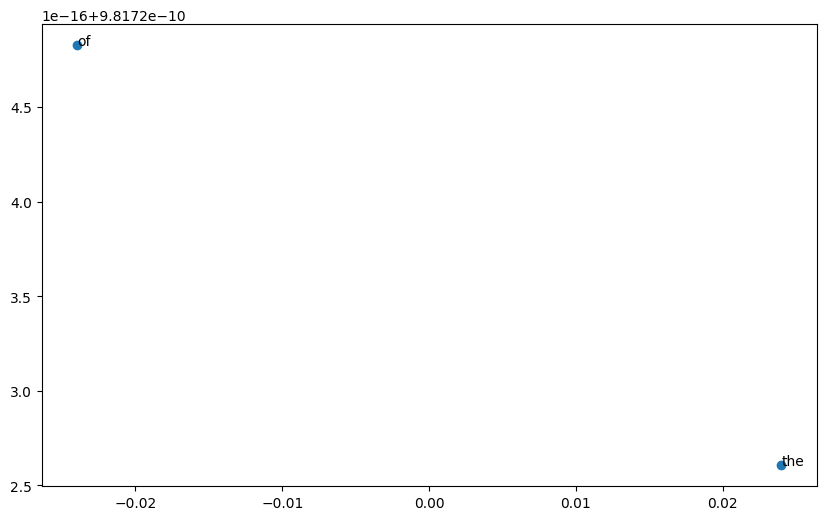

In [9]:
# Install or upgrade Gensim library
!pip install --upgrade gensim

# Importing necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import csv

# Step 1: Read sentences from CSV file
def read_sentences_from_csv(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            sentences.append(row[0].split())  # Assuming the first column contains sentences
    return sentences

# Step 2: Train Word2Vec model
def train_word2vec_model(sentences):
    # Training Word2Vec model with a 300-dimensional vector size
    word2vec_model = Word2Vec(sentences, vector_size=300)
    return word2vec_model

# Step 3: Visualize word embeddings using PCA
def visualize_embeddings(model):
    vocab = list(model.wv.index_to_key)
    X = model.wv[vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(vocab):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

# Main function
def main():
    file_path = "cleaned_reviews.csv"  # Replace with your file path
    sentences = read_sentences_from_csv(file_path)
    model = train_word2vec_model(sentences)
    visualize_embeddings(model)

if __name__ == "__main__":
    main()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [11]:


# Link: https://github.com/Madhu-3499/DataScienceEssentials/blob/main/annotated_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The assignment covers a wide range of natural language processing tasks, including data preprocessing, N-gram analysis, TF-IDF calculation, sentiment analysis, word embedding training, and visualization. While each task presents its own challenges, such as data cleaning and implementing algorithms from scratch, the diversity of tasks allows for a comprehensive exploration of natural language processing concepts. Despite the potential complexity of training word embeddings from scratch, the hands-on experience and creative freedom provided by the assignment make it an enjoyable learning opportunity. The time required to complete the assignment may vary depending on prior experience and dataset complexity, but with dedication and effort, completing the tasks within a reasonable timeframe is achievable.